In [111]:
! pip install wordcloud

In [112]:
import pandas as pd
import glob #파일을 불러들여서 배열로 바꿔주는 것
import re #정규식
from functools import reduce #차원을 축소하는 것 (2차월 배열을 1차월 배열로 축소)

#nltk가 메인. 
from nltk.tokenize import word_tokenize #단어를 끊어내는 것 (사전에 있는 단위로 끊음)
from nltk.corpus import stopwords #불용어. 의미에 크게 영향을 미치지 않는 관사, 조사 등
from nltk.stem import WordNetLemmatizer #표제어. 일반화 시키는 것 예) be동사의 am, are, is = be V임.(원형)

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

import nltk #nltk.download()를 하기 위해 import함
nltk.download() #최초 한 번만 설치 : download창이 뜨면, 모두 선택하고 [Download] 버튼 클릭 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [113]:
#1. 데이터 준비
# 1-1 파일 병합합
### 데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 결과 화면과 다를 수 있습니다.

In [114]:
all_files = glob.glob('exportExcelData_*.xls') #배열로 만들어줌

all_files #출력하여 내용확인

['exportExcelData_20241217091106.xls',
 'exportExcelData_20241217092004.xls',
 'exportExcelData_20241217092029.xls',
 'exportExcelData_20241217092053.xls',
 'exportExcelData_20241217092122.xls',
 'exportExcelData_20241217092152.xls',
 'exportExcelData_20241217092417.xls',
 'exportExcelData_20241217092452.xls',
 'exportExcelData_20241217092509.xls',
 'exportExcelData_20241217092526.xls']

In [115]:
all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
2,NaN,3,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,NaN,4,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...,"Choi, Unho",unknown,2022
4,NaN,5,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
...,...,...,...,...,...,...
95,NaN,96,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
96,NaN,97,Big Data and the Rise of Machines in Financial...,unknown,Mary Ann Leibert,2014
97,NaN,98,A GIS-based analytical framework for evaluatin...,"Wang, Siqin",John Wiley & Sons Ltd,2023
98,NaN,99,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022


In [116]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True) # axis가 0이므로 밑으로 붙임임
all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
2,NaN,3,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,NaN,4,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...,"Choi, Unho",unknown,2022
4,NaN,5,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
...,...,...,...,...,...,...
995,NaN,96,A code offloading scheme for big-data processi...,"Hung, S. H.; Tzeng, T. T.; Wu, G. D.; Shieh, J...","John Wiley & Sons, Ltd",2015
996,NaN,97,BITKOM: Beste Voraussetzungen für den Big-Data...,unknown,Deutscher Fachverlag GmbH,2016
997,NaN,98,Fast algorithm for relaxation processes in big...,"Hwang, S.; Lee, D.-S.; Kahng, B.",AMERICAN PHYSICAL SOCIETY,2014
998,NaN,99,Deadline-Aware Scheduling and Flexible Bandwid...,"Srinivasan, Srinikethan Madapuzi",IEEE,2018


In [117]:
all_files_data_concat.to_csv('riss_bigdata1.csv', encoding='utf-8', index= False)

In [118]:
#데이터 전처리 (Pre-processing)
#제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0            Architecting Time-Critical Big-Data Systems
1      A Game Theoretic Approach for Addressing Domai...
2      A trust-based crowdfunding campaign marketing ...
3      <bold>D</bold>ense <bold>o</bold>r <bold>S</bo...
4      Computation migration: a new approach to execu...
                             ...                        
995    A code offloading scheme for big-data processi...
996    BITKOM: Beste Voraussetzungen für den Big-Data...
997    Fast algorithm for relaxation processes in big...
998    Deadline-Aware Scheduling and Flexible Bandwid...
999    Future Prospects of Mathematical Modeling Anal...
Name: 제목, Length: 1000, dtype: object

In [119]:
stopWords = set(stopwords.words("english")) #영어의 불용어 처리
lemma = WordNetLemmatizer() 

In [120]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) #re:정규표현식,  
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #배열에서 원소를 하나씩 꺼내서 넣은 foreach랑 비슷
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [121]:
print(words)

[['architecting', 'time', 'critical', 'big', 'data', 'system'], ['game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data'], ['trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice'], ['bold', 'bold', 'ense', 'bold', 'bold', 'r', 'bold', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'optimal', 'big', 'data', 'processing'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation'], ['multiple', 'target', 'tracking', 'big', 'data', 

In [122]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #작업내용 확인

['architecting', 'time', 'critical', 'big', 'data', 'system', 'game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'bold', 'bold', 'ense', 'bold', 'bold', 'r', 'bold', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'optimal', 'big', 'data', 'processing', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'multiple', 'target', 'tracking', 'big', 'data', 'based', 'measureme

In [123]:
#2. 데이터 탐색 ## 2-1단어 빈도 탐색
count = Counter(words2)
count

Counter({'data': 1089,
         'big': 1026,
         'analytics': 158,
         'analysis': 120,
         'based': 99,
         'system': 82,
         'application': 74,
         'using': 66,
         'issue': 64,
         'model': 64,
         'special': 56,
         'approach': 55,
         'learning': 55,
         'call': 49,
         'paper': 49,
         'framework': 45,
         'algorithm': 40,
         'cloud': 40,
         'management': 39,
         'computing': 39,
         'driven': 37,
         'processing': 34,
         'network': 34,
         'health': 34,
         'research': 33,
         'performance': 30,
         'medical': 30,
         'platform': 29,
         'new': 28,
         'review': 28,
         'earth': 28,
         'der': 28,
         'era': 27,
         'study': 27,
         'technology': 27,
         'perspective': 27,
         'machine': 27,
         'china': 26,
         'science': 25,
         'method': 25,
         'evidence': 25,
         'smart': 23

In [124]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print ("%s :%d" % (tag, counts))

data :1089
big :1026
analytics :158
analysis :120
based :99
system :82
application :74
using :66
issue :64
model :64
special :56
approach :55
learning :55
call :49
paper :49
framework :45
algorithm :40
cloud :40
management :39
computing :39
driven :37
processing :34
network :34
health :34
research :33
performance :30
medical :30
platform :29
new :28
review :28
earth :28
der :28
era :27
study :27
technology :27
perspective :27
machine :27
china :26
science :25
method :25
evidence :25
smart :23
intelligence :22
distributed :22
environment :22
efficient :21
challenge :21
high :21
service :21
engineering :20


In [125]:
##검색어로 사용한 big과 data 빈도가 압도적으로 많으므로, 이를 제거한다.

In [126]:
del word_count ['big']
del word_count ['data']

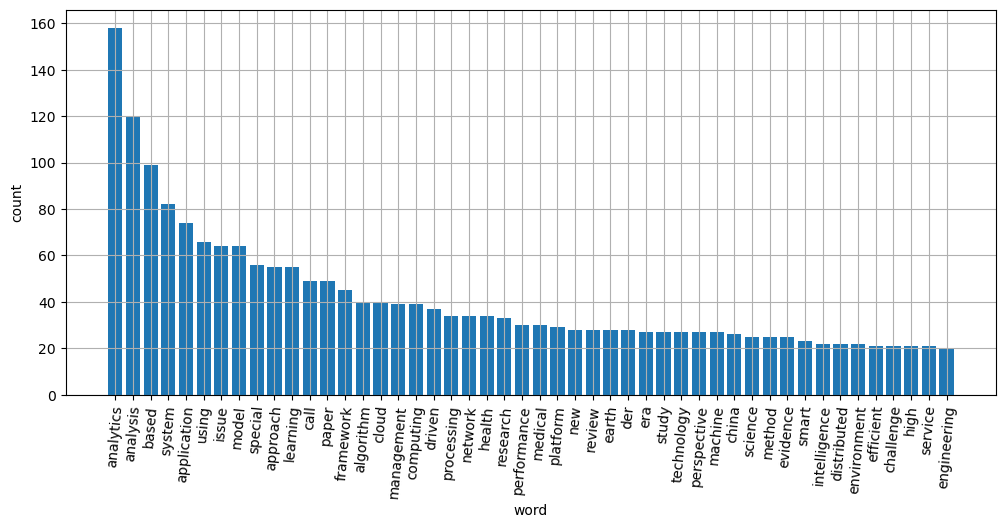

In [130]:
#히스토그램 표시 옵션
plt.figure(figsize=(12, 5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)

plt.show()

In [131]:
#3. 분석 모델 구축 및 결과 시각화
## 3-1 연도별 데이터 수

all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year #출력하여 내용화인

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,1
3,2012,6
4,2013,30
5,2014,84
6,2015,65
7,2016,100
8,2017,107
9,2018,115


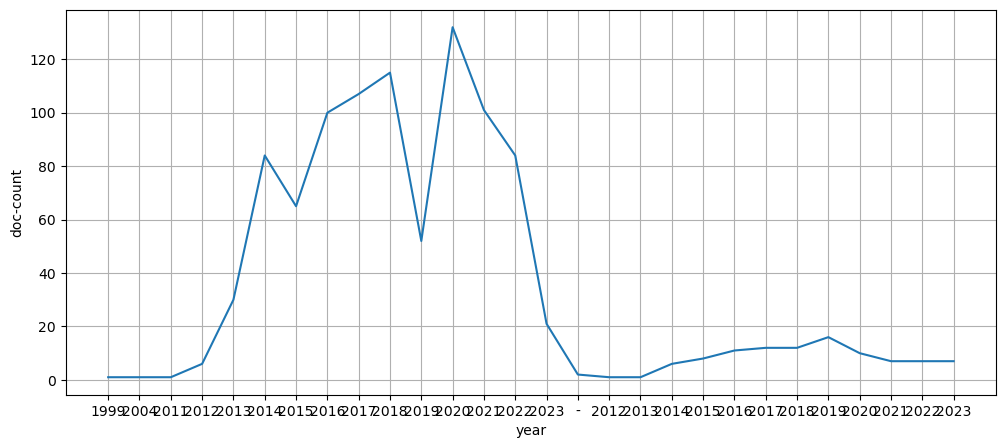

In [132]:
plt.figure(figsize=(12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

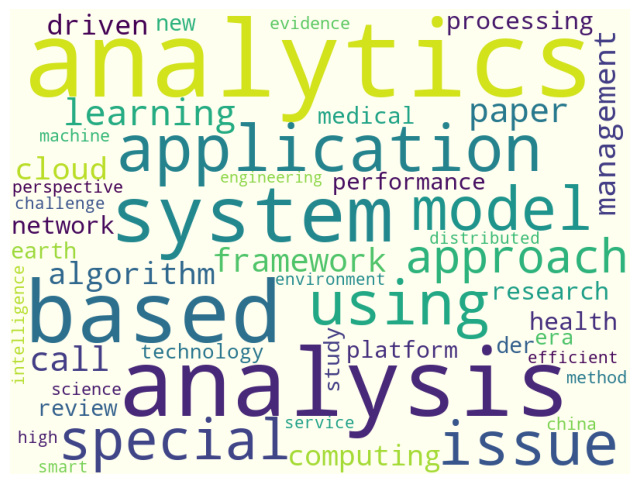

In [135]:
stopwords = set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [137]:
##워드 클라우드에 나타나는 단어의 위치는 실행할 때마다 달라진다.
cloud.to_file("riss_bigdata_wordCloud.jpg")